<a href="https://colab.research.google.com/github/ashok-lamichhane/Transaction-Categorization-Project---ML-Supervised-Models/blob/main/Transaction_Categorization_Project_ML_Supervised_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impor Data Part

In [4]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:

df = pd.read_csv('/content/nepali_transactions_dataset.csv')
df.head()


,Transaction ID,Transaction Initiator,Receiver,Amount,Transaction Remarks,Transaction Category
0,T000001,Sita Lama,Krishna Thapa,5062.84,Bus ticket to Pokhara,Travel
1,T000002,Kanchan Tamang,Bimal Thapa,14911.29,Bus ticket to Pokhara,Travel
2,T000003,Ram Lama,Krishna Basnet,19941.78,Hotel booking in Chitwan,Travel
3,T000004,Kiran Bhandari,Nabin KC,18193.76,Home decor from Shopmandu,Shopping
4,T000005,Manish Lama,Sita Bhandari,17166.25,Home decor from Shopmandu,Shopping


# Data Preprocessing

In [5]:
# Droping missing values
df.dropna(inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Text cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to 'Transaction Remarks'
df['Transaction Remarks'] = df['Transaction Remarks'].apply(clean_text)

# Define features and target
X = df[['Transaction Remarks', 'Amount']]
y = df['Transaction Category']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Transaction Remarks'),
        ('num', StandardScaler(), ['Amount'])
    ]
)


# Logistic Regression Model

In [14]:
logreg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
logreg_preds = logreg_pipeline.predict(X_test)

print("📘 Logistic Regression Report:")
print(classification_report(y_test, logreg_preds, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, logreg_preds))


📘 Logistic Regression Report:
                 precision    recall  f1-score   support

   Bill Sharing       1.00      1.00      1.00       284
      Education       1.00      1.00      1.00       349
Food and Dining       1.00      1.00      1.00       285
         Health       1.00      1.00      1.00       408
       Shopping       1.00      1.00      1.00       290
         Travel       1.00      1.00      1.00       288
      Utilities       1.00      1.00      1.00       276

       accuracy                           1.00      2180
      macro avg       1.00      1.00      1.00      2180
   weighted avg       1.00      1.00      1.00      2180

Accuracy: 1.0


# Random Forest Model

In [15]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)

print("\n🌲 Random Forest Report:")
print(classification_report(y_test, rf_preds, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, rf_preds))



🌲 Random Forest Report:
                 precision    recall  f1-score   support

   Bill Sharing       1.00      1.00      1.00       284
      Education       1.00      1.00      1.00       349
Food and Dining       1.00      1.00      1.00       285
         Health       1.00      1.00      1.00       408
       Shopping       1.00      1.00      1.00       290
         Travel       1.00      1.00      1.00       288
      Utilities       1.00      1.00      1.00       276

       accuracy                           1.00      2180
      macro avg       1.00      1.00      1.00      2180
   weighted avg       1.00      1.00      1.00      2180

Accuracy: 1.0


# Visualization Of Both Mdoels

<ipython-input-10-6752a56cf114>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transaction Category', order=df['Transaction Category'].value_counts().index, palette='viridis')


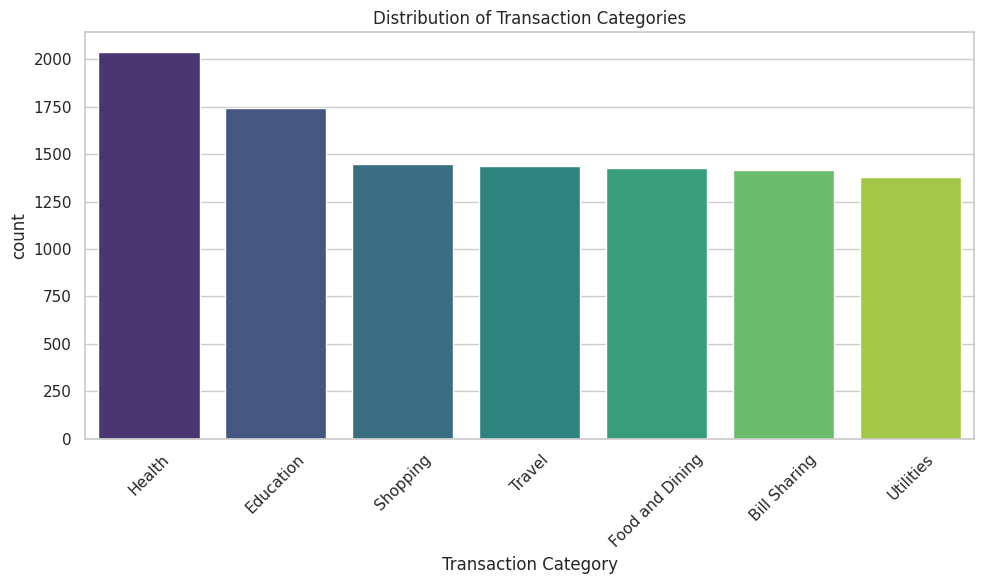

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Transaction Category', order=df['Transaction Category'].value_counts().index, palette='viridis')
plt.title("Distribution of Transaction Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


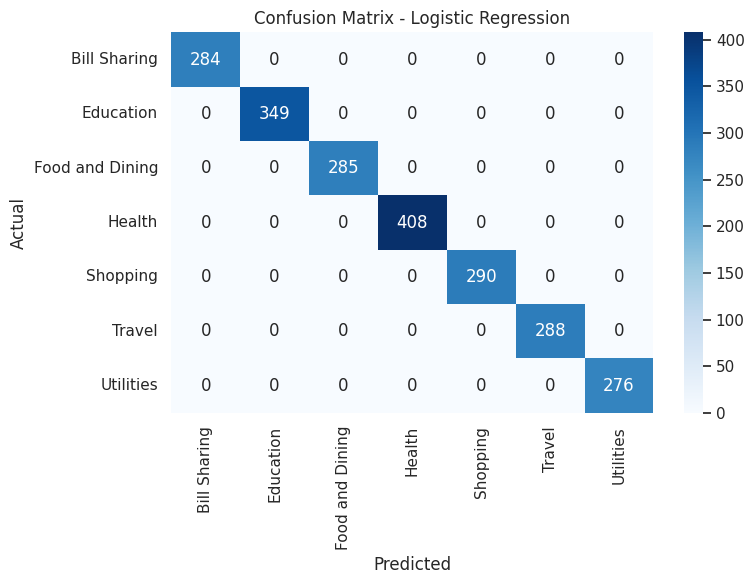

In [11]:
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_test, logreg_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

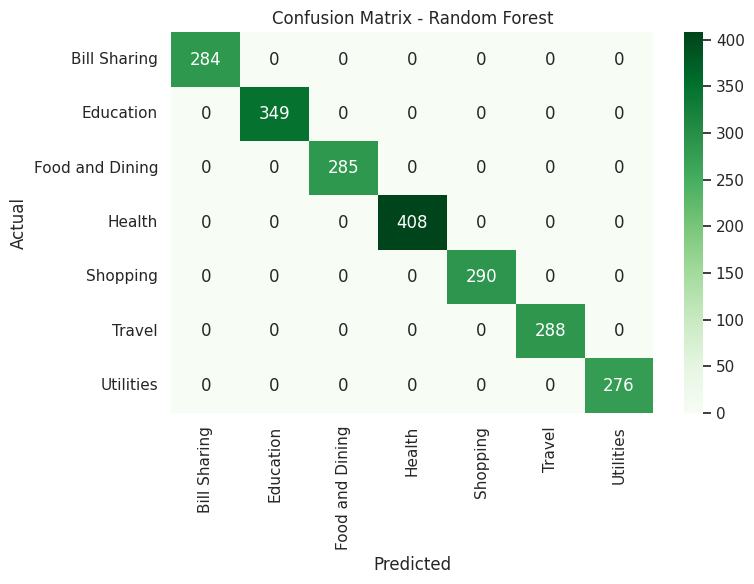

In [12]:
rf_cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import f1_score, accuracy_score

logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_f1 = f1_score(y_test, logreg_preds, average='weighted')

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

metrics_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [logreg_accuracy, rf_accuracy],
    'F1 Score': [logreg_f1, rf_f1]
})

metrics_table


,Model,Accuracy,F1 Score
0,Logistic Regression,1.0,1.0
1,Random Forest,1.0,1.0
